In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
sess = None

def reset_vars():
    sess.run(tf.global_variables_initializer())

def reset_tf():
    global sess
    if sess:
        sess.close()
    tf.reset_default_graph()
    sess = tf.Session()

## Exercise

Build an iterative TensorFlow graph that calculates the $n^{th}$ Fibonacci number $F_n$.  Recall that $F_n = F_{n-1} + F_{n-2}$, with $F_1 = F_2 = 1$. 

In [4]:
reset_tf()

F = tf.Variable([0,1], dtype=np.int64)
update = F.assign([F[1], F[0] + F[1]])

In [5]:
def fib(n):
    if n < 1:
        return 0
    reset_vars()
    for i in xrange(n - 1):
        sess.run(update)
    return sess.run(F)[1]

In [6]:
fib(80)

23416728348467685

Note that using int64 is important.  The default int dtype (on my system, at least) is int32, which overflows.

In [7]:
reset_tf()

F = tf.Variable([0,1])
update = F.assign([F[1], F[0] + F[1]])

In [8]:
def fib(n):
    if n < 1:
        return 0
    reset_vars()
    for i in xrange(n - 1):
        sess.run(update)
    return sess.run(F)[1]

In [9]:
fib(80)

-285007387

This doesn't work, because the definition of F_next depends on F_high, which is already updated.

In [10]:
reset_tf()

F_low = tf.Variable(1)
F_high = tf.Variable(1)
F_next = F_low + F_high
update1 = F_low.assign(F_high)
update2 = F_high.assign(F_next)

In [11]:
reset_vars()
for i in xrange(5):
    print sess.run(F_next)
    sess.run(update1)
    sess.run(update2)

2
3
6
12
24


## Minimum of Gamma function

In [12]:
reset_tf()

x = tf.Variable(0.01)
f = tf.exp(tf.lgamma(x))

fp = tf.gradients(f, x)[0]
fpp = tf.gradients(fp, x)[0]
iterate = x.assign(x - fp / fpp)

In [13]:
reset_vars()
for i in xrange(20):
    print sess.run(iterate)

0.0149995
0.0224977
0.0337412
0.0505945
0.0758357
0.113576
0.169819
0.253112
0.375071
0.549999
0.790623
1.08825
1.3554
1.45524
1.46161
1.46163
1.46163
1.46163
1.46163
1.46163


## 2D Function

In [14]:
reset_tf()

x = np.linspace(0, 5)
y = np.linspace(0, 5)

X, Y = np.meshgrid(x, y)

/opt/conda/envs/datacourse/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


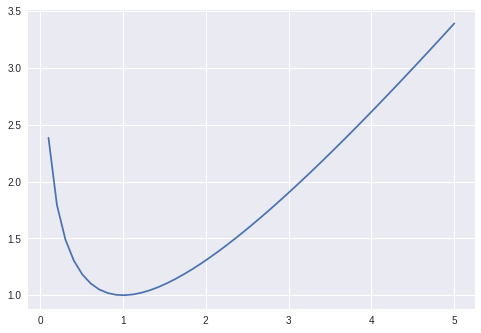

In [15]:
plt.plot(x, x - np.log(x))

/opt/conda/envs/datacourse/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/opt/conda/envs/datacourse/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.


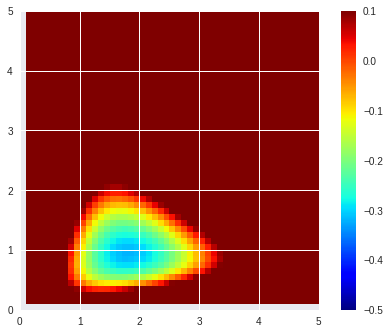

In [16]:
plt.imshow(X * Y - 0.5 * X * np.log(Y) - Y * np.log(X) - np.log(2 * X + Y),
           origin='lower', cmap=plt.cm.jet, extent=(0,5,0,5),
           vmin=-0.5, vmax=0.1)
plt.colorbar()

In [17]:
x = tf.Variable([1., 1.])
f = x[0] * x[1] - 0.5 * x[0] * tf.log(x[1]) - x[1] * tf.log(x[0]) \
    - tf.log(2 * x[0] + x[1])

In [21]:
fp = tf.gradients(f, x)[0]
fxp = tf.gradients(fp[0], x)[0]
fyp = tf.gradients(fp[1], x)[0]
det_H = fxp[0] * fyp[1] - fxp[1] * fyp[0]

update = x.assign(x + [(fxp[1] * fp[1] - fyp[1] * fp[0]) / det_H,
                       (fxp[1] * fp[0] - fxp[0] * fp[1]) / det_H])

Tensor("gradients_7/AddN_3:0", shape=(2,), dtype=float32)


In [19]:
reset_vars()
for i in xrange(10):
    print sess.run(update)

[ 1.4482758   0.93103456]
[ 1.72337842  0.91573083]
[ 1.7810725  0.9086411]
[ 1.7830646  0.9085663]
[ 1.78306663  0.908566  ]
[ 1.78306675  0.90856606]
[ 1.78306663  0.908566  ]
[ 1.78306675  0.90856606]
[ 1.78306663  0.908566  ]
[ 1.78306675  0.90856606]


*Copyright &copy; 2017 The Data Incubator.  All rights reserved.*